# Epymorph dev log: May 17th, 2023

_author: Tyler Coles_

_as of git hash: 3bf6135bad5006300030b172c2664a5dfe65dbb0_

We knew we needed a way to pass in parameter values at runtime. Up to now they had been hard-coded into the various scripts and examples, which really only works as long as we're doing very simple or very Pei-like IPMs.

This update includes the ability to specify a file containing parameter values at the command line.

Will we stick with this solution in the long term? Possibly not. But it's good enough for now.

## Simple Parameter Input

First we create our params file at `~/Documents/epymorph-examples/params-01.toml`:

```toml
theta = 0.1
move_control = 0.9
infection_duration = 4.0
immunity_duration = 90.0
infection_seed_loc = 0
infection_seed_size = 10000
```

Now the following bit of code is equivalent to running this run command:

```bash
python -m epymorph run --ipm pei --mm pei --geo pei --params "~/Documents/epymorph-examples/params-01.toml" --start_date "2015-01-01" --duration "150d" --chart "e0"
```

Loading requirements:
[✓] IPM (pei)
[✓] MM (pei)
[✓] Geo (pei)
[✓] Parameters (file:/home/tcoles/Documents/epymorph-examples/params-01.toml)

Running simulation:
• 2015-01-01 to 2015-05-31 (150 days)
• 6 geo nodes
|#################################| 100% (0.582s)
Displaying chart: e0


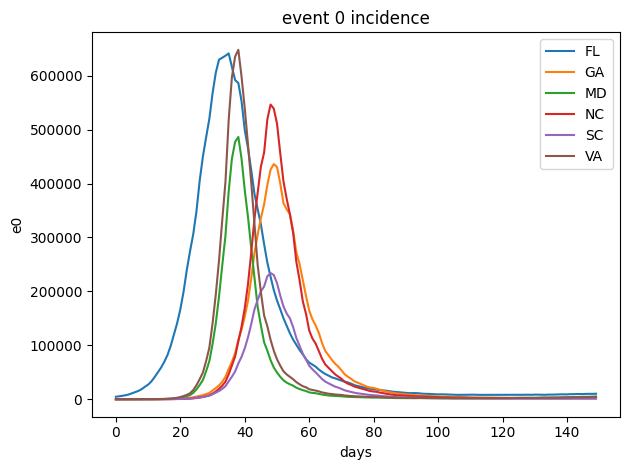

Done


In [4]:
import os

from epymorph.run import run

examples_dir = os.path.expanduser('~/Documents/epymorph-examples')

exit_code = run(
    ipm_name='pei',
    mm_name='pei',
    geo_name='pei',
    start_date_str='2015-01-01',
    duration_str='150d',
    params_path=f"{examples_dir}/params-01.toml",
    chart='e0',
    profiling=False
)


## Complex Parameter Input

With a slight tweak to the IPM, we can even feed in time-varying, population-varying, and time-and-population-varying parameters. To illustrate, I've added an IPM called `simple_sirs` which tweaks Pei to accept a `beta` parameter rather than calculating it from humidity.

First our parameter file (`~/Documents/epymorph-examples/params-04.toml`):

```toml
theta = 0.1
move_control = 0.9
infection_duration = 4.0
immunity_duration = 90.0
infection_seed_loc = 0
infection_seed_size = 10000

beta =[[0.45458581, 0.54526144, 0.42627116, 0.48149461, 0.49224869, 0.49549972],
       [0.62155307, 0.43692663, 0.53636641, 0.28064693, 0.43579269, 0.56312866],
       [0.36808048, 0.42442227, 0.45040707, 0.30906476, 0.57207275, 0.58588118],
       
       ...OMITTING MANY ROWS FOR BREVITY...       

       [0.3866279 , 0.44466794, 0.40128918, 0.36604762, 0.39288199, 0.51233511],
       [0.54520862, 0.51815756, 0.36563468, 0.45433068, 0.31776468, 0.50709533],
       [0.5622243 , 0.39630522, 0.4874483 , 0.50581733, 0.47501478, 0.45484987]]
```

Here we use a beta that is 150 rows by 6 columns; that is the number of days (D) by the number of population nodes (N).

This IPM is configured to also accept a 1-dimensional array of length D or of length N, and the values will be repeated as necessary to fill out the DxN array.

(This behavior is not currently universal, but may be in future versions.)

Loading requirements:
[✓] IPM (simple_sirs)
[✓] MM (pei)
[✓] Geo (pei)
[✓] Parameters (file:/home/tcoles/Documents/epymorph-examples/params-04.toml)

Running simulation:
• 2015-01-01 to 2015-05-31 (150 days)
• 6 geo nodes
|#################################| 100% (0.589s)
Displaying chart: e0


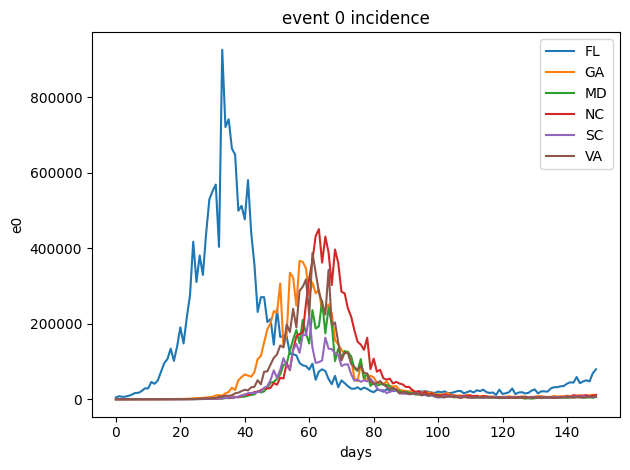

Done


In [5]:
exit_code = run(
    ipm_name='simple_sirs',
    mm_name='pei',
    geo_name='pei',
    start_date_str='2015-01-01',
    duration_str='150d',
    params_path=f"{examples_dir}/params-04.toml",
    chart='e0',
    profiling=False
)


## Error Messaging

If you tried to run with a params file that doesn't exist, you get output like this:

In [6]:
exit_code = run(
    ipm_name='pei',
    mm_name='pei',
    geo_name='pei',
    start_date_str='2015-01-01',
    duration_str='150d',
    params_path=f"{examples_dir}/not-a-file",
    chart='e0',
    profiling=False
)


Loading requirements:
[✓] IPM (pei)
[✓] MM (pei)
[✓] Geo (pei)
[X] Parameters (file:/home/tcoles/Documents/epymorph-examples/not-a-file)
ERROR: Unable to load parameters: /home/tcoles/Documents/epymorph-examples/not-a-file
